# JupyterLab Interface

[see more](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)

![](images/interface_jupyterlab1.png)

# Batteries overview

## Jupyter interactive widgets framework

[see more](https://github.com/matplotlib/jupyter-matplotlib)

![](images/matplotlib.gif)

## A Table of Contents extension for JupyterLab

[see more](https://github.com/ian-r-rose/jupyterlab-toc)

![](images/toc.gif)

## Standalone integration of drawio

[see more](https://github.com/QuantStack/jupyterlab-drawio)

Open files/diagram.dio 

![](images/drawio.gif)

## Go to definition

[see more](https://github.com/krassowski/jupyterlab-go-to-definition)

![](images/demo.gif)

## Autoreload

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
# test autoreload custom module
from files import module

module.custom_sqrt(25)

5.0

In [4]:
df = (
    pd.read_csv("files/data.csv", index_col=0, parse_dates=["date"])
    .assign(year=lambda x: x.date.dt.year.astype(int))
    .assign(dayofyear=lambda x: x.date.dt.dayofyear)
)
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,year,dayofyear
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,1
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,3
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,4
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,5


## Black

```python
%load_ext lab_black
```

Black is the uncompromising Python code formatter

[see more](https://github.com/psf/black)

In [5]:
%load_ext lab_black

```python
# automatic convert this
(df.query("date > '2012-01-02'").query("weather == 'rain'").rename(
        columns={"year": "Year"}
    ).sort_values("dayofyear", ascending=False).reset_index(drop=True)\
    .drop("precipitation", axis=1).groupby("Year").agg(
    {"temp_max": ["mean", "std"]}))
```

In [6]:
# to this
(
    df.query("date > '2012-01-02'")
    .query("weather == 'rain'")
    .rename(columns={"year": "Year"})
    .sort_values("dayofyear", ascending=False)
    .reset_index(drop=True)
    .drop("precipitation", axis=1)
    .groupby("Year")
    .agg({"temp_max": ["mean", "std"]})
)

temp_max          
           mean       std
Year                     
2012  12.818947  5.106709
2013  10.621667  3.756310
2014  27.766667  8.764892
2015  18.540000  6.134574

# Charts 

## Matplotlib (inline)

```python
%matplotlib inline
```

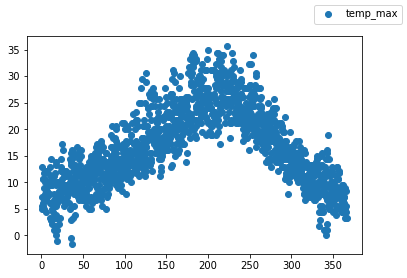

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df["dayofyear"], df["temp_max"], label="temp_max")
fig.legend()
plt.show()

## Matplotlib (interactive plot)

```python
%matplotlib widget
```

Chart does not show in html

In [8]:
# item should be run once
%matplotlib widget
%matplotlib widget

In [9]:
# %matplotlib widget
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(df["dayofyear"], df["temp_max"], label="temp_max")
fig.legend()
fig.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Seaborn

In [10]:
import seaborn as sns

sns.set(style="ticks")

sns.pairplot(x_vars=["dayofyear"], y_vars=["temp_max"], data=df, hue="year")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Plotly

[see more](https://plot.ly/python/ipython-notebook-tutorial/)

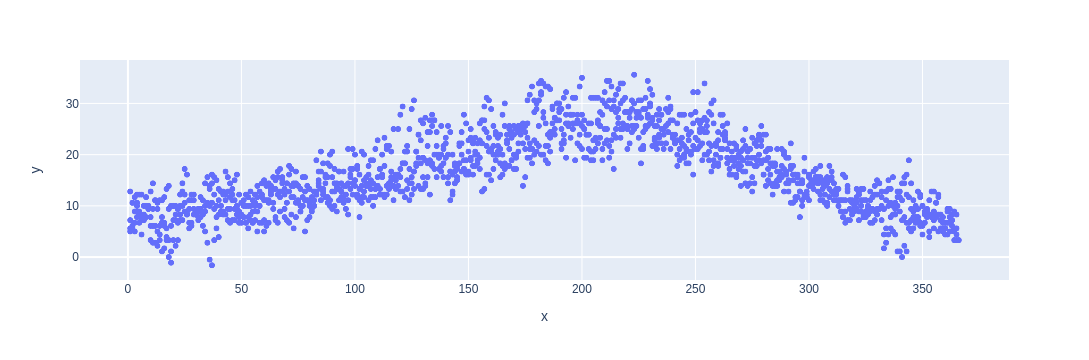

In [11]:
import plotly.express as px
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)

px.scatter(x=df["dayofyear"], y=df["temp_max"], height=300, width=600)

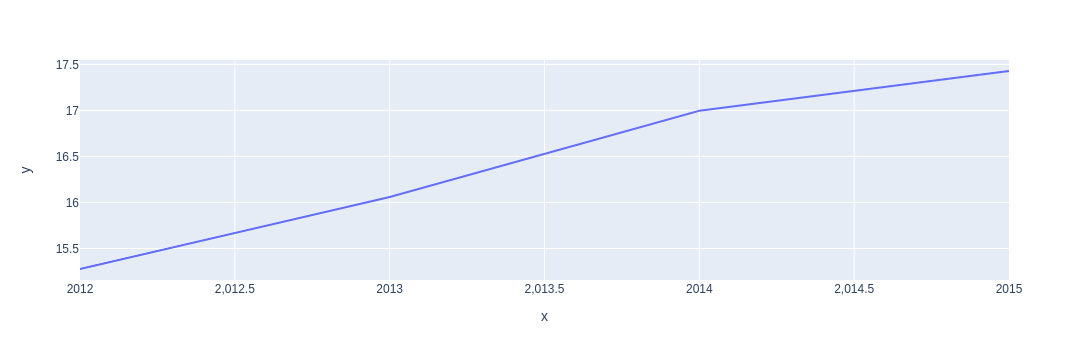

In [12]:
s = df.groupby("year")["temp_max"].mean().reset_index()

px.line(x=s["year"], y=s["temp_max"], height=300, width=600)

## Altair (modern visualization library)

[see more](https://altair-viz.github.io/gallery/index.html)

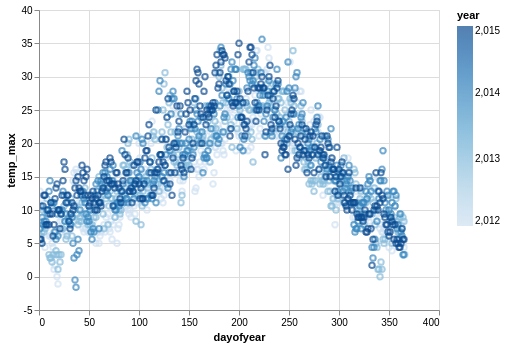

In [13]:
import altair as alt

(
    alt.Chart(df)
    .mark_point()
    .encode(x="dayofyear", y="temp_max", color="year",)
    .interactive()
)

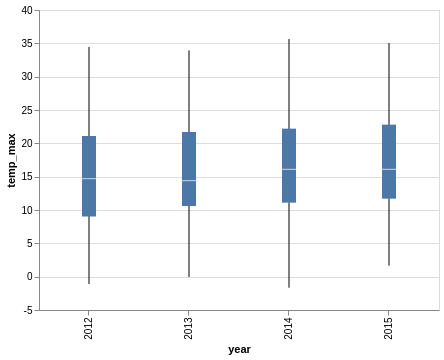

In [14]:
(
    alt.Chart(df)
    .mark_boxplot()
    .encode(x="year:O", y="mean(temp_max)")
    .properties(width=400)
)

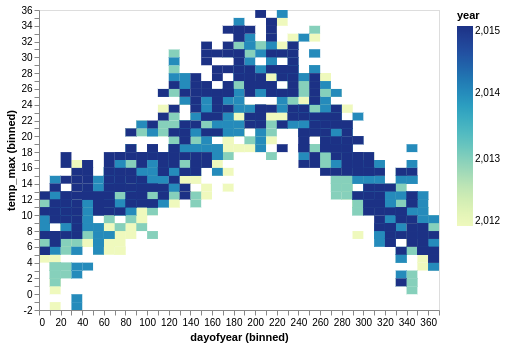

In [15]:
(
    alt.Chart(df)
    .mark_rect()
    .encode(
        alt.X("dayofyear:Q", bin=alt.Bin(maxbins=52)),
        alt.Y("temp_max:Q", bin=alt.Bin(maxbins=40)),
        alt.Color("year", scale=alt.Scale()),
    )
    .interactive()
)

In [16]:
def plot_months(alt, df):

    step = 40
    overlap = 1

    chart = (
        alt.Chart(df)
        .transform_timeunit(Month="month(date)")
        .transform_joinaggregate(mean_temp="mean(temp_max)", groupby=["Month"])
        .transform_bin(["bin_max", "bin_min"], "temp_max")
        .transform_aggregate(
            value="count()", groupby=["Month", "mean_temp", "bin_min", "bin_max"]
        )
        .transform_impute(
            impute="value", groupby=["Month", "mean_temp"], key="bin_min", value=0
        )
        .mark_area(
            interpolate="monotone", fillOpacity=0.8, stroke="lightgray", strokeWidth=0.5
        )
        .encode(
            alt.X("bin_min:Q", bin="binned", title="Maximum Daily Temperature (C)"),
            alt.Y("value:Q", scale=alt.Scale(range=[step, -step * overlap]), axis=None),
            alt.Fill(
                "mean_temp:Q",
                legend=None,
                scale=alt.Scale(domain=[30, 5], scheme="redyellowblue"),
            ),
            alt.Row(
                "Month:T",
                title=None,
                header=alt.Header(labelAngle=0, labelAlign="right", format="%B"),
            ),
        )
        .properties(bounds="flush", title="Seattle Weather", height=step)
        .configure_facet(spacing=0)
        .configure_view(stroke=None)
        .configure_title(anchor="end")
    )

    return chart

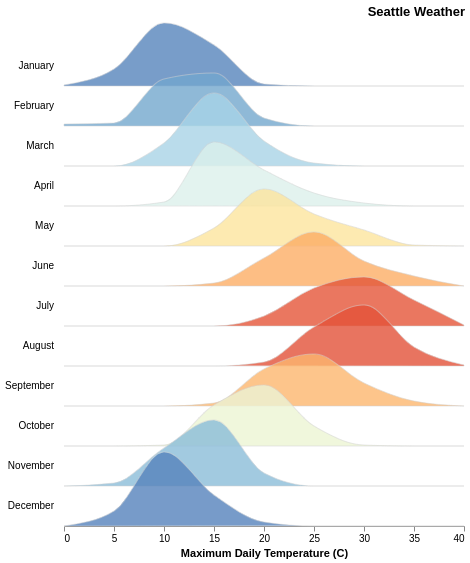

In [17]:
plot_months(alt, df)

# Thank you